## **Context**

Brain tumor is known to be one of the most aggressive diseases that affect both children and adults. Of all primary Central Nervous System (CNS) tumors, brain tumors account for 85 to 90 percent. **Around 11,700 individuals are diagnosed with a brain tumor every year.** For individuals with a cancerous brain or CNS tumor, **the 5-year survival rate is around 34 percent for men and 36 percent for women.** Brain tumors are classified into Benign Tumors, Pituitary Tumors, Malignant Tumors etc. In order to increase the life expectancy of patients, adequate care, preparation and reliable diagnostics are required in the treatment process.

**Magnetic Resonance Imaging (MRI)** is the best way to identify brain tumors. A huge amount of image data is produced through MRI Scans. However, there are several anomalies in the tumor size and location (s). This makes it very difficult to completely comprehend the nature of the tumor. **A trained neurosurgeon is usually needed for MRI image analysis.** **The lack of qualified doctors and the lack of knowledge about tumors makes it very difficult and time-consuming for clinical facilities in developing countries to perform MRI studies.** Due to the level of difficulty involved in comprehending the nature of brain tumors and their properties, manual analyses can be highly error-prone. That makes an automated MRI analysis system crucial to solve this problem. 

**Applications of automated classification techniques using Machine Learning (ML) and Artificial Intelligence (AI) algorithms have consistently shown better performance than manual classification.** It would therefore be highly beneficial to write an algorithm that performs **detection and classification of brain tumors using Deep Learning Algorithms.**

## **Dataset**

The dataset folder contains MRI data. The images are already split into Training and Testing folders.
Each folder has more four subfolders named **`"glioma_tumor", "meningioma_tumor", "no_tumor"`** and **`"pituitary_tumor"`**. These folders have MRI images of the respective tumor classes.

```
from google.colab import drive
drive.mount('/content/drive')
```

## **Problem Statement**

To build a classification model that can take images of MRI scans as input and can classify them into one of the following types of tumor:

**`glioma_tumor`**, **`meningioma_tumor`**, **`pituitary_tumor`** and **`no_tumor`**.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing the libraries**

In [ ]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers


### **Reading the Training Data**

In [ ]:
DATADIR = r"/content/drive/MyDrive/Data Set Brain Tumor/Training"
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]

#Storing all the training images
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)# Converting image to greyscale to reduce the complexity and computation 
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()


### **Reading the Testing Dataset**


In [ ]:

DATADIR = r"/content/drive/MyDrive/Data Set Brain Tumor/Testing"
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]

#Storing all the training images
testing_data = []

def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)# Converting image to greyscale to reduce the complexity and computation 
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass
create_testing_data()


### **Data Preprocessing** 

In [ ]:
# Separating the images and labels
X_train = []
y_train = []
np.random.shuffle(training_data)
for features,label in training_data:
    X_train.append(features)
    y_train.append(label)
X_train= np.array(X_train)
print(X_train.shape)

# Normalizing pixel values  
X_train = X_train/255.0  
# image reshaping 
X_train = X_train.reshape(-1,150,150,1)

(2881, 150, 150)


In [ ]:
X_test = []
y_test = []

np.random.shuffle(testing_data)
IMG_SIZE = 150
for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)
X_test = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X_test.shape)
X_test = X_test/255.0  
X_test = X_test.reshape(-1,150,150,1)

(402, 150, 150)


### **Exploratory Data Analysis**

In [ ]:
#creating the dataframe to plot the pie chart
df=pd.DataFrame(y_train,columns=['Suffering'])

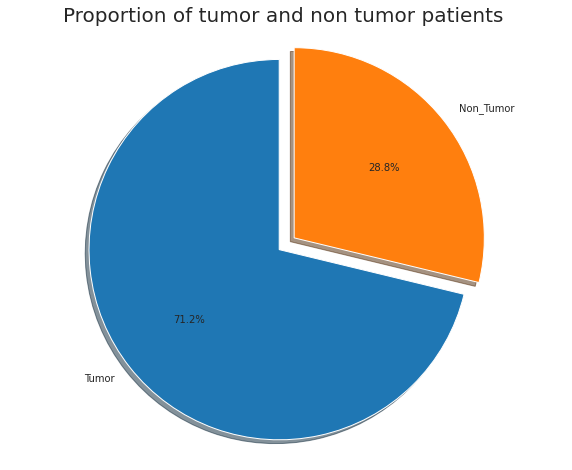

In [ ]:
#plotting the pie chart 
labels = 'Tumor', 'Non_Tumor'
sizes = [df.Suffering[df['Suffering']!=0].count(), df.Suffering[df['Suffering']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of tumor and non tumor patients ", size = 20)
plt.show()

The above plot shows that **this dataset is imbalanced**, because **71.2% of the images are those of tumors** - Majority class: glioma, meningioma and pituitary tumors, while approx. **28.8% of the images** belong to the **non-tumor category** (Minority class).

**Visualize MRI images randomly from each of the three classes.** The Image matrix is plotted and each row represents three single channel images corresponding to one class. ** read single channel images in order to reduce complexity.  

In [ ]:
#train_dir = 'DATA/train' # image folder
import os
# get the list of jpegs from sub image class folders
glioma_tumor_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[0]}') ]
meningioma_tumor_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[1]}') ]
no_tumor_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[2]}') ]
pituitary_tumor_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[3]}') ]

# randomly select 3 of each
select_gal = np.random.choice(glioma_tumor_imgs, 3, replace = False)
select_menin = np.random.choice(meningioma_tumor_imgs, 3, replace = False)
select_no_t = np.random.choice(no_tumor_imgs, 3, replace = False)
select_pit = np.random.choice(pituitary_tumor_imgs, 3, replace = False)


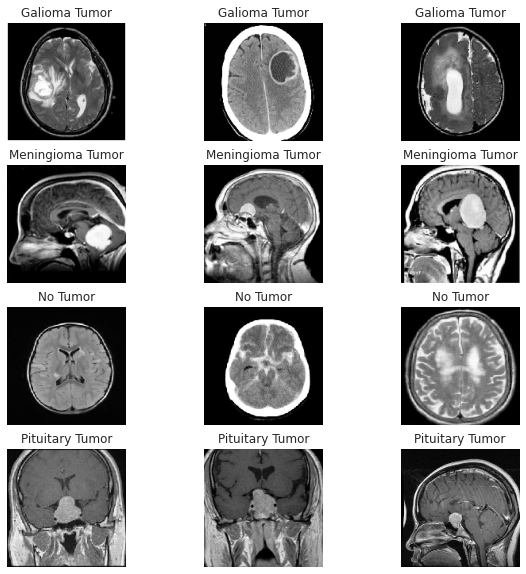

In [ ]:
from keras.preprocessing import image
# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (10,10))
for i in range(12):
    if i < 3:
        fp = f'{DATADIR}/{CATEGORIES[0]}/{select_gal[i]}'
        label = 'Galioma Tumor'
    if i>=3 and i<6:
        fp = f'{DATADIR}/{CATEGORIES[1]}/{select_menin[i-3]}'
        label = 'Meningioma Tumor' 
    if i>=6 and i<9:
        fp = f'{DATADIR}/{CATEGORIES[2]}/{select_no_t[i-6]}'
        label = 'No Tumor'
    if i>=9 and i<12:
        fp = f'{DATADIR}/{CATEGORIES[3]}/{select_pit[i-9]}'
        label = 'Pituitary Tumor'
    ax = fig.add_subplot(4, 3, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (150,150), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

# also check the number of files here

**Finding the mean images** for each class of tumor: 

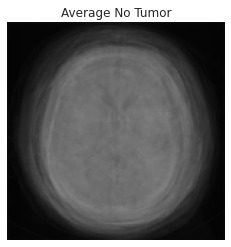

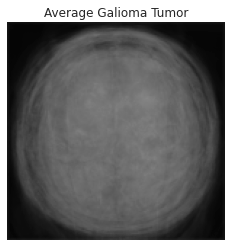

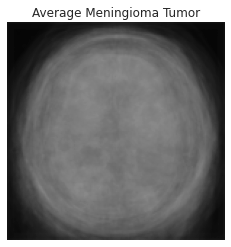

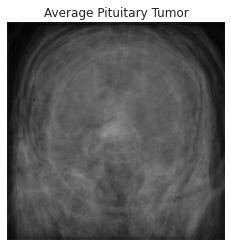

In [ ]:
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape((150,150))
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

galioma_data=[]
menin_data=[]
               
no_tumor_data=[]
               
pitu_data=[]

for cat in CATEGORIES:
        path = os.path.join(DATADIR,cat)
        for img in os.listdir(path):
                
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)# Converting image to greyscale to reduce the complexity and computation 
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                if cat==CATEGORIES[0]:
                      galioma_data.append([new_array])
                if cat==CATEGORIES[1]:
                      menin_data.append([new_array])
                if cat==CATEGORIES[2]:
                      no_tumor_data.append([new_array])
                if cat==CATEGORIES[3]:
                      pitu_data.append([new_array])

                

norm_mean = find_mean_img(np.array(no_tumor_data), 'No Tumor')
gali_mean = find_mean_img(np.array(galioma_data), 'Galioma Tumor')
menin_mean = find_mean_img(np.array(menin_data), 'Meningioma Tumor')
Pitu_mean = find_mean_img(np.array(pitu_data), 'Pituitary Tumor')


### **Contrast Difference**

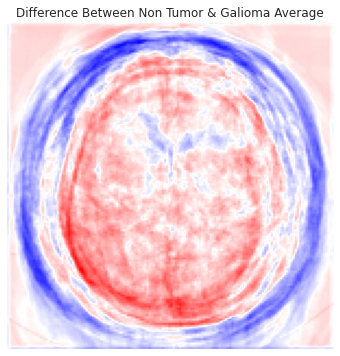

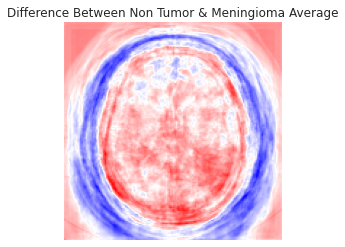

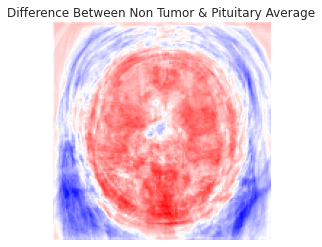

In [ ]:
fig = plt.figure(figsize = (8,6))

for i in enumerate([gali_mean,menin_mean,Pitu_mean]):
      
      contrast_mean = norm_mean - i[1]
      plt.imshow(contrast_mean, cmap='bwr')
      if i[0]==0:
          plt.title(f'Difference Between Non Tumor & Galioma Average')
      if i[0]==1:
          plt.title(f'Difference Between Non Tumor & Meningioma Average')
      if i[0]==2:
          plt.title(f'Difference Between Non Tumor & Pituitary Average')
      plt.axis('off')
      plt.show()

From the contrast difference between the 'No tumor' image and the 'tumor' image, the **blue area represents the negative** values, meaning the **size of the tumorous brain is more than non-tumourous brain**.

In [ ]:
#one hot encoding
encoded = to_categorical(np.array(y_train))
y_train_e=encoded
encoded_test = to_categorical(np.array(y_test))
y_test_e=encoded_test

In [ ]:
print(y_train_e.shape)
print(y_test_e.shape)

(2881, 4)
(402, 4)


### **Model Building** 
model building by using ANN/CNN

#### **ANN** (Artificial Neural Network - fully connected)

In [ ]:
#Build the model
# 3 layers, 1 layer to flatten the image to a 28 x 28 = 784 vector
#           1 layer with 128 neurons and relu function
#           1 layer with 10 neurons and softmax function
#Create the neural network model
def create_model(): 
        model_ann = keras.Sequential([
            keras.layers.Flatten(input_shape=(150,150)),
            keras.layers.Dense(500,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(700,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(4, kernel_initializer='random_uniform',activation=tf.nn.softmax)
        ])
        #Compile the model
        #The loss function measures how well the model did on training , and then tries 
        #to improve on it using the optimizer
        model_ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model_ann

In [ ]:
model_ann=create_model()
model_ann.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 22500)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 500)               11250500  
_________________________________________________________________
dense_13 (Dense)             (None, 700)               350700    
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 2804      
Total params: 11,604,004
Trainable params: 11,604,004
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train the model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history=model_ann.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=200, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training

Epoch 1/200
36/36 [==============================] - 4s 105ms/step - loss: 3.3193 - accuracy: 0.3551 - val_loss: 1.0074 - val_accuracy: 0.6014

Epoch 00001: val_accuracy improved from -inf to 0.60139, saving model to best_model.h5
Epoch 2/200
36/36 [==============================] - 4s 102ms/step - loss: 0.8979 - accuracy: 0.6244 - val_loss: 0.8897 - val_accuracy: 0.6499

Epoch 00002: val_accuracy improved from 0.60139 to 0.64991, saving model to best_model.h5
Epoch 3/200
36/36 [==============================] - 4s 102ms/step - loss: 0.7619 - accuracy: 0.6962 - val_loss: 0.7694 - val_accuracy: 0.7088

Epoch 00003: val_accuracy improved from 0.64991 to 0.70884, saving model to best_model.h5
Epoch 4/200
36/36 [==============================] - 4s 101ms/step - loss: 0.6097 - accuracy: 0.7548 - val_loss: 0.8904 - val_accuracy: 0.6135

Epoch 00004: val_accuracy did not improve from 0.70884
Epoch 5/200
36/36 [==============================] - 4s 99ms/step - loss: 0.5722 - accuracy: 0.7432 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


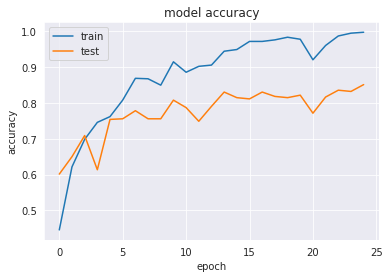

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
import numpy
model_ann.evaluate(X_test,y_test_e)

13/13 [==============================] - 0s 21ms/step - loss: 5.6083 - accuracy: 0.7065


[5.608260154724121, 0.7064676880836487]

**ANN does not show a good test accuracy**, since ANNs are unable to capture spatial correlation characteristics of the image. 

#### ** CNN(Convolutional Neural Network)**

**Model 1:** CNN with Dropout

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model = Sequential()
#
y_train=np.array(y_train)
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150,150,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 64



es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history=model.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training  



Epoch 1/30
36/36 [==============================] - 248s 7s/step - loss: 1.3788 - accuracy: 0.3474 - val_loss: 1.2375 - val_accuracy: 0.4887

Epoch 00001: val_accuracy improved from -inf to 0.48873, saving model to best_model.h5
Epoch 2/30
36/36 [==============================] - 248s 7s/step - loss: 1.1186 - accuracy: 0.5234 - val_loss: 1.0731 - val_accuracy: 0.5269

Epoch 00002: val_accuracy improved from 0.48873 to 0.52686, saving model to best_model.h5
Epoch 3/30
36/36 [==============================] - 245s 7s/step - loss: 0.8693 - accuracy: 0.6094 - val_loss: 0.7816 - val_accuracy: 0.6603

Epoch 00003: val_accuracy improved from 0.52686 to 0.66031, saving model to best_model.h5
Epoch 4/30
36/36 [==============================] - 245s 7s/step - loss: 0.7257 - accuracy: 0.6775 - val_loss: 0.7234 - val_accuracy: 0.6794

Epoch 00004: val_accuracy improved from 0.66031 to 0.67938, saving model to best_model.h5
Epoch 5/30
36/36 [==============================] - 246s 7s/step - loss: 0.

In [ ]:
model.evaluate(X_test,np.array(y_test_e))

13/13 [==============================] - 11s 807ms/step - loss: 4.0493 - accuracy: 0.6915


[4.049304485321045, 0.6915422677993774]

#### **Convolutional Neural Network (CNN)**

**Model 2:** CNN with Dropout after Convolution and having two Dense layers with 16 & 8 units respectively 

Since CNN Model 1 does not appear to have good test accuracy and appears to be overfitting on the training dataset, let's use CNN Model 2, which has a different architecture that should generalize well and not overfit.

In [ ]:
class conv_Layers:

  def __init__(self, nfilters, kernel_size, stride=1, 
               pool_size=2, leakyrelu_slope=0.1, dropc=0.0, bnorm=False):
    self.nfilters = nfilters
    self.kernel_size = kernel_size
    self.stride = stride
    self.pool_size = pool_size
    self.leakyrelu_slope = leakyrelu_slope
    self.dropfrac = dropc
    self.bnorm = bnorm
  
  def __call__(self, x):
    x = Conv2D(self.nfilters, kernel_size=self.kernel_size, 
               strides=self.stride, padding='same')(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0): 
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    x = MaxPool2D(self.pool_size)(x)
    return x

class dense_Layers:

  def __init__(self, nunits, leakyrelu_slope=0.1, dropd=0.0, bnorm=False):
    self.nunits = nunits
    self.leakyrelu_slope = leakyrelu_slope 
    self.dropfrac = dropd
    self.bnorm = bnorm

  def __call__(self, x):
    x = Dense(self.nunits)(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0):
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    return x

def LNmodel(in_shape, conv_filters, dense_filters, kernel_size, num_classes, lr,
            stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.0, dropd=0.0, bnorm=False):

  in_shape = X_train.shape[1:]
  i = Input(shape=in_shape)
  for ncl, nconvfilters in enumerate(conv_filters):
    if (ncl==0):
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(i)
    else:
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(x)

  x = Flatten()(x)

  for ndl, ndunits in enumerate(dense_filters):
    x = dense_Layers(ndunits, leakyrelu_slope, dropd, bnorm)(x)

  x = Dense(num_classes, activation='softmax')(x)

  ln_model  = Model(inputs=i, outputs=x)
  adam = optimizers.Adam(lr=lr)
  ln_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  return ln_model

In [ ]:
lr = 0.001
kernelsize = 5
in_shape= X_train.shape[1:]
model_ln3 = LNmodel(in_shape, [8,16], [16,8], kernelsize, 4, lr,
                    stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.25,
                    dropd=0.5, bnorm=False)
model_ln3.summary()


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 1)]     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 150, 150, 8)       208       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 150, 150, 8)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 150, 150, 8)       0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 16)        3216      
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 75, 75, 16)        0   

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_model_ln3 = model_ln3.fit(X_train, y_train_e, 
                                  validation_split=0.1,
                                  verbose=1, batch_size=256,
                                  shuffle=True, epochs=60,callbacks=[es,mc])

Epoch 1/60
11/11 [==============================] - 47s 4s/step - loss: 1.3705 - accuracy: 0.3164 - val_loss: 1.3379 - val_accuracy: 0.5813

Epoch 00001: val_accuracy improved from -inf to 0.58131, saving model to best_model.h5
Epoch 2/60
11/11 [==============================] - 46s 4s/step - loss: 1.2839 - accuracy: 0.3731 - val_loss: 1.3757 - val_accuracy: 0.3702

Epoch 00002: val_accuracy did not improve from 0.58131
Epoch 3/60
11/11 [==============================] - 45s 4s/step - loss: 1.2383 - accuracy: 0.4029 - val_loss: 1.2522 - val_accuracy: 0.7612

Epoch 00003: val_accuracy improved from 0.58131 to 0.76125, saving model to best_model.h5
Epoch 4/60
11/11 [==============================] - 48s 4s/step - loss: 1.2123 - accuracy: 0.4020 - val_loss: 1.1360 - val_accuracy: 0.8443

Epoch 00004: val_accuracy improved from 0.76125 to 0.84429, saving model to best_model.h5
Epoch 5/60
11/11 [==============================] - 45s 4s/step - loss: 1.1890 - accuracy: 0.4030 - val_loss: 1.18

This model unfortunately **does not have a good test accuracy,** and it appears to be **underfitting on the training dataset.** which means that need to increase the complexity of the model in the next attempt.

#### **Convolutional Neural Network (CNN)** 

**Model 3:** CNN with Dropout after Convolution and having two Dense layers with 512 & 256 Units respectively 

In [ ]:
lr = 0.001
kernelsize = 5
model_ln4 = LNmodel(in_shape, [8,16], [512,256], kernelsize, 4, lr,
                    stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.25,
                    dropd=0.5, bnorm=False)
model_ln4.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 150, 150, 1)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 150, 150, 8)       208       
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 150, 150, 8)       0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 150, 150, 8)       0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 16)        3216      
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 75, 75, 16)        0   

In [ ]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_model_ln4 = model_ln4.fit(X_train, y_train_e, 
                                  validation_split=0.1,
                                  verbose=1, batch_size=512, 
                                  shuffle=True, epochs=40,callbacks=[es,mc])

Epoch 1/40
6/6 [==============================] - 50s 8s/step - loss: 1.0857 - accuracy: 0.5147 - val_loss: 1.5517 - val_accuracy: 0.3149

Epoch 00001: val_accuracy improved from -inf to 0.31488, saving model to best_model.h5
Epoch 2/40
6/6 [==============================] - 50s 8s/step - loss: 0.9277 - accuracy: 0.5868 - val_loss: 0.9219 - val_accuracy: 0.8097

Epoch 00002: val_accuracy improved from 0.31488 to 0.80969, saving model to best_model.h5
Epoch 3/40
6/6 [==============================] - 50s 8s/step - loss: 0.7879 - accuracy: 0.6539 - val_loss: 0.7665 - val_accuracy: 0.8201

Epoch 00003: val_accuracy improved from 0.80969 to 0.82007, saving model to best_model.h5
Epoch 4/40
6/6 [==============================] - 50s 8s/step - loss: 0.7011 - accuracy: 0.6948 - val_loss: 0.7414 - val_accuracy: 0.7716

Epoch 00004: val_accuracy did not improve from 0.82007
Epoch 5/40
6/6 [==============================] - 50s 8s/step - loss: 0.6169 - accuracy: 0.7311 - val_loss: 0.7731 - val_a

### **Plotting the Train & Test Accuracy**

**CNN Model 1**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


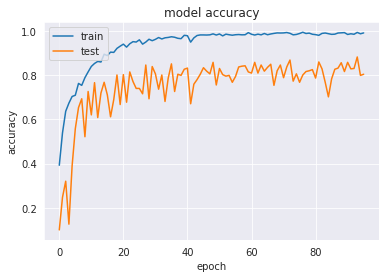

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**CNN Model 2**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


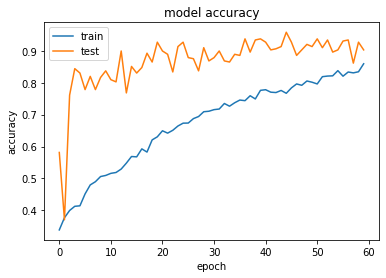

In [ ]:
print(history_model_ln3.history.keys())
# summarize history for accuracy
plt.plot(history_model_ln3.history['accuracy'])
plt.plot(history_model_ln3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**CNN Model 3**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


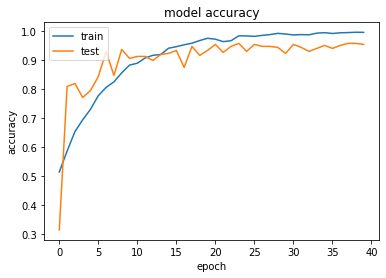

In [ ]:
print(history_model_ln4.history.keys())
# summarize history for accuracy
plt.plot(history_model_ln4.history['accuracy'])
plt.plot(history_model_ln4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### **Model Evaluation**

**CNN Model 1**

In [ ]:
model.evaluate(X_test,y_test_e)

13/13 [==============================] - 10s 747ms/step - loss: 4.8989 - accuracy: 0.6866


[4.8988800048828125, 0.6865671873092651]

**CNN Model 2**

In [ ]:
model_ln3.evaluate(X_test,y_test_e)

13/13 [==============================] - 2s 143ms/step - loss: 1.5445 - accuracy: 0.7463


[1.544519066810608, 0.746268630027771]

**CNN Model 3**

In [ ]:
model_ln4.evaluate(X_test,y_test_e)

13/13 [==============================] - 2s 156ms/step - loss: 2.3007 - accuracy: 0.7637


[2.3007419109344482, 0.7636815905570984]

Unfortunately, **cannot decide the best model based on test accuracy here** because dealing with an imbalanced dataset is more concerned with **Precision and Recall**. Since these two metrics are both quite important in this scenario, check the **F1 score** to try to achieve a good balance between Precision and Recall. 

### **Plotting the confusion matrix for the two best models** 

**Model 2 and Model 3 seem to be generalizing well** because they both have a good Holdout set Accuracy. Compute the confusion matrix for these two models to understand the distribution of True Positives, False Positives, False Negatives and True Negatives.

**CNN Model 2**

In [ ]:
# Test Prediction 
y_test_pred_ln3 = model_ln3.predict(X_test)
y_test_pred_classes_ln3 = np.argmax(y_test_pred_ln3, axis=1)
y_test_pred_prob_ln3 = np.max(y_test_pred_ln3, axis=1)


In [ ]:
# Test Accuracy 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(np.array(y_test), y_test_pred_classes_ln3)

0.746268656716418

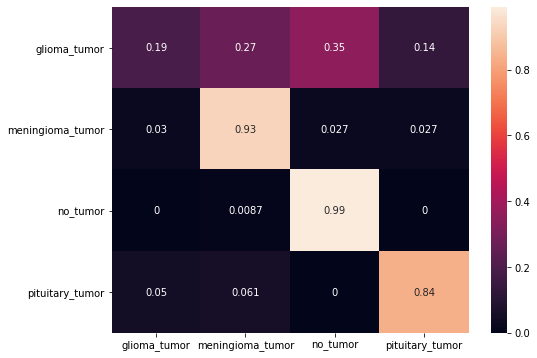

In [ ]:
cf_matrix = confusion_matrix(np.array(y_test), y_test_pred_classes_ln3)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

**CNN Model 3**

In [ ]:
#Test Prediction 

y_test_pred_ln4 = model_ln4.predict(X_test)
y_test_pred_classes_ln4 = np.argmax(y_test_pred_ln4, axis=1)
y_test_pred_prob_ln4 = np.max(y_test_pred_ln4, axis=1)


In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(np.array(y_test), y_test_pred_classes_ln4)

0.763681592039801

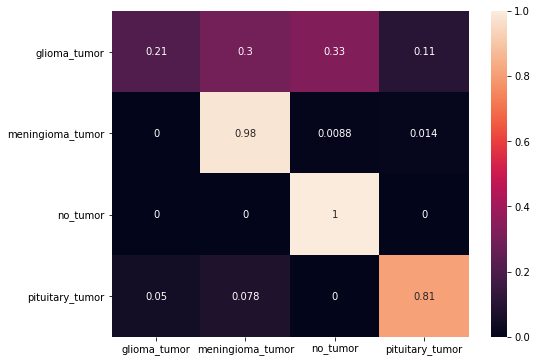

In [ ]:
cf_matrix = confusion_matrix(np.array(y_test), y_test_pred_classes_ln4)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

The above two confusion matrices show that the models seem to be working well. **Let's calculate the F1 score** (the harmonic mean of precision and recall), which is used as an evaluation metric for imbalanced datasets.

**Classification Report for each class** 

- **Precision:** precision is the fraction of relevant instances among the retrieved instances.

- **Recall:** recall is the fraction of relevant instances that were retrieved.

- **F-beta score:** The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0. The beta parameter determines the weight of recall in the combined score.



The order of printing the above metrices for each class is as follows:

- **Glioma Tumor**
- **Meningioma Tumor**
- **Non Tumor**
- **Pituitary Tumor**



**CNN Model 2**

In [ ]:

from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(np.array(y_test), y_test_pred_classes_ln3, average=None,labels=list(np.unique(y_test)))

print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

 Precision is [0.7037037  0.73287671 0.72258065 0.83783784]
 Recall is [0.19       0.93043478 0.99115044 0.83783784] 
 f_beta Score is [0.2992126  0.81992337 0.8358209  0.83783784]


**CNN Model 3**

In [ ]:

from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(np.array(y_test), y_test_pred_classes_ln4, average=None,labels=list(np.unique(y_test)))


print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

 Precision is [0.80769231 0.72435897 0.74834437 0.86956522]
 Recall is [0.21       0.9826087  1.         0.81081081] 
 f_beta Score is [0.33333333 0.83394834 0.85606061 0.83916084]


**Model 3 (Best) Observation**

The precision for each class, the Pituitary tumor classifier has the highest precision. But here, **concerned about the case where a person who has a tumor is wrongly classified as belonging to the non-tumor category (False Negative).** 

**33% of the persons belonging to Glioma tumour and 8.6% belonging to Meningioma tumor are not identified correctly, and the model predicts that they don't have a tumor at all** - which shows that our model does not do well in identifying glioma and meningioma tumors. But it is works well for the other scenario, where the model is able to correctly identify those scans that do not not show a tumor. 

---



### **Weighted F-Score**

**Model 2**

In [ ]:

from sklearn.metrics import f1_score

f1_score(np.array(y_test), y_test_pred_classes_ln3, average='weighted')

0.6981597233234159

**Model 3**

In [ ]:

from sklearn.metrics import f1_score

f1_score(np.array(y_test), y_test_pred_classes_ln4, average='weighted')

0.7165923954146127

Model 3 with 2 Dense layer and more  number of units having better F1 score.

### **Prediction**
predict with best model with is model_ln4

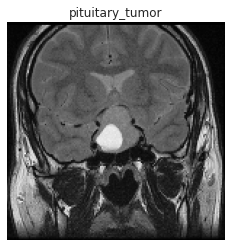

In [ ]:
#fn = image.load_img(fp, target_size = (150,150), color_mode='grayscale')
plt.imshow(X_test[1].reshape(150,150), cmap='Greys_r')
i=y_test[1]
i=np.argmax(i)
if(i == 0):
    plt.title("glioma_tumor")
if(i==1):
    plt.title("meningioma_tumor")
if(i==2):
    plt.title("no_tumor")
if(i==3):
    plt.title("pituitary_tumor")

plt.axis('off')
plt.show()

In [ ]:
res=model_ln4.predict(X_test[1].reshape(1,150,150,1))

In [ ]:
i=np.argmax(res)


if(i == 0):
    print("glioma_tumor")
if(i==1):
    print("meningioma_tumor")
if(i==2):
    print("no_tumor")
if(i==3):
    print("pituitary_tumor")


pituitary_tumor


### **Conclusion**

Following by above, **ANNs do not work well with image data**, because ANNs do not take 2-D images as input. They flatten the image and make it lose its spatial struture, whereas CNNs take the full 2D-image as input in order to perform feature extraction. So **CNNs do not lose the image's spatial structure, which makes them more suitable for working with image datasets.**

**There is still scope for improvement in the test accuracy and F1 score of the CNN model** chosen here. **Different architectures** can be built and **hyperparamter tuning** can be performed to obtain a better brain tumor classifier. 

- Visualized the filters and understand why the model does not do well in the identification of the glioma tumor.